In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('TCS.CSV')
df 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-27,122.800003,122.800003,119.820000,120.332497,88.088272,30646000.0
1,2004-08-30,121.237503,123.750000,120.625000,123.345001,90.293549,24465208.0
2,2004-08-31,123.312500,123.750000,122.000000,123.512497,90.416122,21194656.0
3,2004-09-01,123.750000,124.375000,122.949997,123.487503,90.397820,19935544.0
4,2004-09-02,123.737503,125.574997,123.250000,124.207497,90.924896,21356352.0
...,...,...,...,...,...,...,...
4489,2022-10-18,3150.000000,3155.350098,3128.550049,3144.699951,3144.699951,1793722.0
4490,2022-10-19,3159.000000,3159.000000,3112.000000,3121.850098,3121.850098,1194289.0
4491,2022-10-20,3105.000000,3160.000000,3105.000000,3157.300049,3157.300049,1587601.0
4492,2022-10-21,3157.800049,3160.399902,3127.000000,3137.399902,3137.399902,1021913.0


In [3]:
df = pd.read_csv('ADANIPORTS.NS.CSV')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-02,122.800003,123.750000,111.000000,114.699997,107.949486,1572363.0
1,2012-01-03,117.500000,120.900002,115.000000,120.300003,113.219917,1385662.0
2,2012-01-04,121.000000,123.500000,118.000000,122.849998,115.619843,1259249.0
3,2012-01-05,122.000000,127.599998,121.300003,126.699997,119.243248,788405.0
4,2012-01-06,126.250000,128.750000,124.300003,127.699997,120.184387,1036623.0
...,...,...,...,...,...,...,...
2466,2021-12-27,717.000000,726.400024,713.000000,723.200012,718.224426,2663285.0
2467,2021-12-28,727.099976,738.900024,725.200012,729.250000,724.232788,3604123.0
2468,2021-12-29,729.000000,734.200012,720.099976,722.750000,717.777527,2396416.0
2469,2021-12-30,722.900024,726.000000,716.450012,724.250000,719.267212,3654532.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2471 entries, 0 to 2470
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2471 non-null   object 
 1   Open       2465 non-null   float64
 2   High       2465 non-null   float64
 3   Low        2465 non-null   float64
 4   Close      2465 non-null   float64
 5   Adj Close  2465 non-null   float64
 6   Volume     2465 non-null   float64
dtypes: float64(6), object(1)
memory usage: 135.3+ KB


In [5]:
df['Close'] = df['Close'].fillna(df['Close'].mean())

In [6]:
df.shape

(2471, 7)

In [7]:
# df = df.drop(['Date'],axis=1)
# df1=df.reset_index()['Close']
import datetime
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2471 entries, 0 to 2470
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2471 non-null   datetime64[ns]
 1   Open       2465 non-null   float64       
 2   High       2465 non-null   float64       
 3   Low        2465 non-null   float64       
 4   Close      2471 non-null   float64       
 5   Adj Close  2465 non-null   float64       
 6   Volume     2465 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 135.3 KB


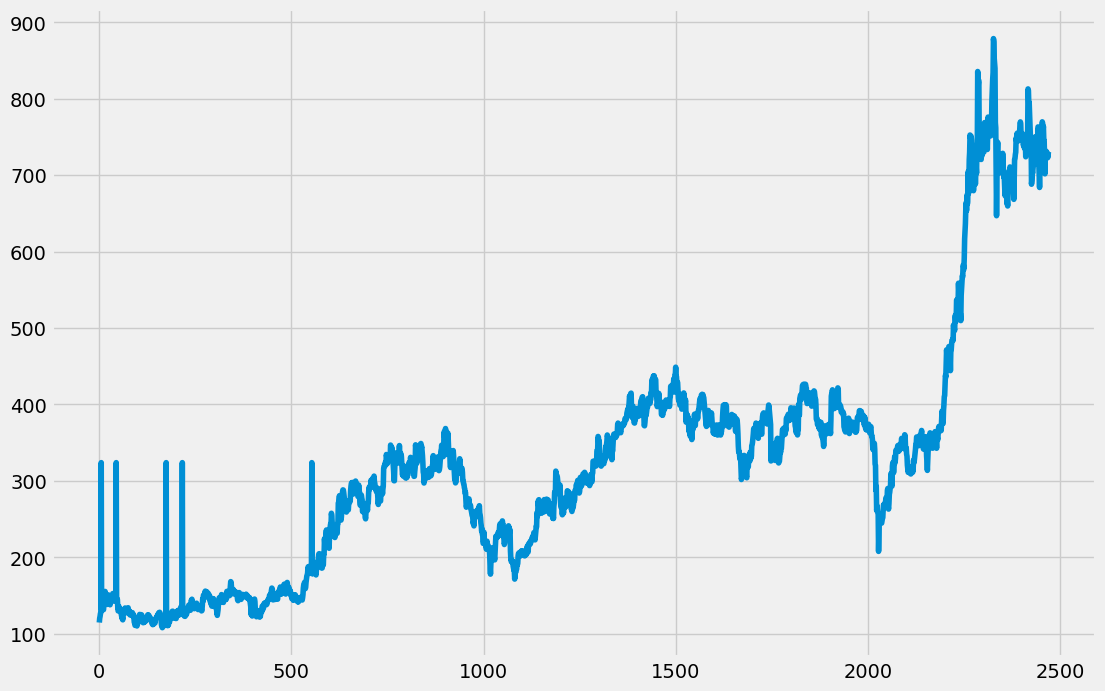

In [9]:
plt.figure(figsize=(12,8))
plt.plot(df['Close'])
plt.show()

In [10]:
data = pd.DataFrame(df['Close'])
data_set = data.values
type(data_set)

numpy.ndarray

In [11]:
data_set

array([[114.699997],
       [120.300003],
       [122.849998],
       ...,
       [722.75    ],
       [724.25    ],
       [730.299988]])

In [12]:
train_size = int(len(data_set) * 0.80)    #training_data_len
train_size

1976

In [13]:
# Scalling using MinMax Scaler
scaler = MinMaxScaler(feature_range=(0,1))
scaleddata = scaler.fit_transform(data_set)
scaleddata

array([[0.00869452],
       [0.01596159],
       [0.0192707 ],
       ...,
       [0.79775502],
       [0.79970156],
       [0.80755257]])

In [14]:
# Training Dataset
train_data = scaleddata[:train_size, :]
train_data.shape

(1976, 1)

In [15]:
# Splitting x_train and y_train
x_train = []    #independent Variable ---> contains past 100 days value
y_train = []    #dependent Variable (Target)

for i in range(100,len(train_data)):
  x_train.append(train_data[i-100:i,0])
  y_train.append(train_data[i,0])

In [16]:
# Converting the x_train from list to numpy array to train the lstm model

x_train,y_train = np.array(x_train),np.array(y_train)

In [17]:
# Converting it to 3-D dataset as per lstm requirment
x_train = np.reshape(x_train,(x_train.shape[0] ,x_train.shape[1], 1))
x_train.shape

(1876, 100, 1)

In [18]:
y_train.shape,x_train.shape

((1876,), (1876, 100, 1))

In [19]:
test_data = scaleddata[train_size-100: , :]
x_test = []                           # past 100 days value
y_test = data_set[train_size:, :]     # all of the value that the model should predict {actual values 61th value}

for i in range(100,len(test_data)):
  x_test.append(test_data[i-100:i, 0])

In [20]:
# Scalling of test data
x_test = np.array(x_test)

In [21]:
# Reshape the data to 3-D for LSTM
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1], 1))

In [22]:
# LSTM Model
model = Sequential()
model.add (LSTM(50,return_sequences=True,activation='relu',input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences = False))
model.add(Dense(50))     #Connect at layer
model.add(Dense(1))  

In [23]:
model.compile(optimizer='adam',loss = 'mean_squared_error')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 50)                2550      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 33201 (129.69 KB)
Trainable params: 33201 (129.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,batch_size=64)

Epoch 1/20

30/30 [==============================] - 5s 73ms/step - loss: 0.0082 - val_loss: 315919.9375
Epoch 2/20
30/30 [==============================] - 2s 53ms/step - loss: 5.5960e-04 - val_loss: 315905.6875
Epoch 3/20
30/30 [==============================] - 2s 55ms/step - loss: 4.0118e-04 - val_loss: 315905.0938
Epoch 4/20
30/30 [==============================] - 2s 56ms/step - loss: 3.8533e-04 - val_loss: 315920.2500
Epoch 5/20
30/30 [==============================] - 2s 58ms/step - loss: 3.7760e-04 - val_loss: 315926.8125
Epoch 6/20
30/30 [==============================] - 2s 62ms/step - loss: 3.7118e-04 - val_loss: 315914.0938
Epoch 7/20
30/30 [==============================] - 2s 59ms/step - loss: 3.7152e-04 - val_loss: 315930.2812
Epoch 8/20
30/30 [==============================] - 2s 58ms/step - loss: 3.4708e-04 - val_loss: 315922.9375
Epoch 9/20
30/30 [==============================] - 2s 55ms/step - loss: 3.4376e-04 - val_loss: 315928.5000
Epoch 10/20
30/30 [============

In [26]:
pred = model.predict(x_test)                                            #it must be similar to y_test
pred = scaler.inverse_transform(pred)

16/16 [==============================] - 1s 16ms/step


In [27]:
pred

array([[374.7051 ],
       [377.2662 ],
       [379.65286],
       [382.45117],
       [385.12027],
       [387.15924],
       [388.45486],
       [389.38986],
       [390.00388],
       [389.9053 ],
       [388.4421 ],
       [386.43356],
       [384.8336 ],
       [383.90234],
       [383.27554],
       [382.43484],
       [380.52203],
       [379.68134],
       [378.7659 ],
       [376.84207],
       [374.40945],
       [372.69492],
       [370.78934],
       [369.53015],
       [368.68347],
       [368.01602],
       [368.32697],
       [369.0996 ],
       [369.3988 ],
       [369.16364],
       [368.17264],
       [367.41992],
       [367.47696],
       [367.8788 ],
       [367.30945],
       [365.84332],
       [364.09695],
       [361.80276],
       [358.03687],
       [353.80325],
       [350.6893 ],
       [348.34143],
       [347.11255],
       [345.63956],
       [341.7936 ],
       [337.05566],
       [328.3367 ],
       [319.3755 ],
       [307.46347],
       [296.28934],


In [28]:
rmse = np.sqrt(np.mean(pred-y_test)**2)
rmse

11.102610361195945

In [29]:
errors = abs(pred - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Accuracy: 96.44 %.


C:\Users\avish\AppData\Local\Temp\ipykernel_4516\2408688277.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = pred


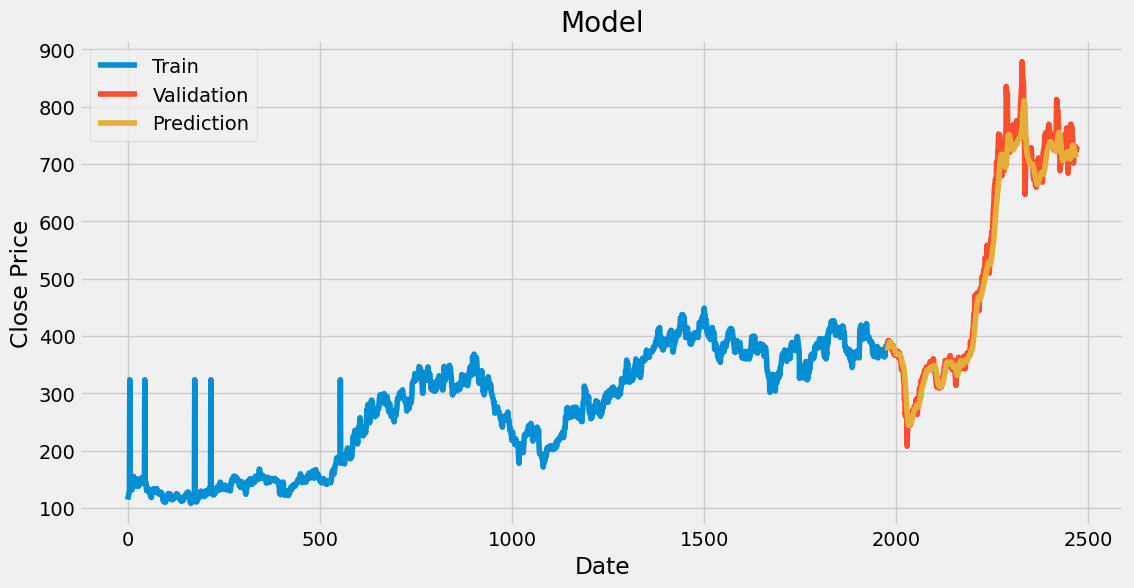

In [30]:
train = data[:train_size]
valid = data[train_size:]

valid['Prediction'] = pred

plt.figure(figsize=(12,6))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(train['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Train','Validation','Prediction'],loc='upper left')
plt.show()